## Group Proposal
_________________________________________

## Predicting whether an NBA player will make it to the All-Star team based on their performance statistics in the 2023 season using the 2021-2022 seasons.


**Introduction**

The NBA (National Basketball Association) is a professional basketball league in North America that features 30 teams. Each team consists of players who compete against each other in regular season games, with the goal of making it to the playoffs and eventually winning the NBA championship.
 
The NBA All-Star Game is an annual exhibition game that features the best players from each conference. The players are selected based on a combination of fan, player, and media voting. Being selected to the All-Star team is a significant accomplishment for NBA players and is often seen as a sign of their individual success and impact on the league.
 
The NBA tracks various performance statistics for each player, including points per game, rebounds per game, assists per game, field goal percentage, and many others. These statistics are used to evaluate a player's performance and value to their team.
 
In recent years, there has been an increasing interest in using machine learning and data analysis techniques to predict various outcomes in sports, including player performance, team success, and player awards such as All-Star selections. The NBA 2021-2022 per-game statistics dataset provides a rich source of data that can be used to build predictive models for various outcomes, including predicting whether a player will make it to the All-Star team in the 2023 season.
Our group project aims to predict which NBA players will make it to the All-Star selections for the 2023 season based on their performance using the K-Nearest Neighbour classification method. The NBA is a professional basketball league in North America with 30 teams. Each team consists of players who compete against each other in regular season games, with the goal of making it to the playoffs and eventually winning the NBA championship. This is an enhancement to our group proposal.


**Method**

We will use the NBA 2021-2022 per-game statistics dataset (linked in the references) to build a predictive classification model to predict All-Star selections. We will use data points like the player’s rank, player’s names and teams, their effective field goal percentage, offensive, defensive rebounds per game and total rebounds per game, and points per game. 

For our visualizations, we will use mainly scatter plots since we're dealing with multiple quantitative variables.

To make our predictions, we will be using K-nearest neighbor classification which is found in the parsnip package in R in the tidymodel library. We will use cross validation to find the best value of K that we can use in our project and then fit the model onto the dataset and retrain with our best K value. After that, we will predict the All-Star category of the player by using the model on the test dataset. We will verify the accuracy of the model using validation set and relevant metrics towards the end along with a confusion matrix.


Let's start by loading the important libraries. 

In [112]:
### Loading of base packages manually 

library(datasets)   # loading of library datasets
library(tidyverse)  # loading of tidyverse library
install.packages("kknn")
library(tidymodels)
library(tibble)
library(httr)
options(repr.matrix.max.rows = 6)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



We will read data from the team statistics page for the 2021 - 2022 NBA season and the 2022-2023 NBA season given below in code. 

In [113]:
# URL of the team statistics page for the 2021-2022 NBA season and 2022-2023 NBA season.
# data pulled from: url1 <- "https://www.basketball-reference.com/leagues/NBA_2023_per_game.html"
#                   url2 <- "https://www.basketball-reference.com/leagues/NBA_2022_per_game.html"
basket_2023 <- read_csv("https://raw.githubusercontent.com/DrakenRaptor/Section006-28-Proposal/main/NBA%202022-2023(1).csv")
basket_2023
print("[table 1]")

basket_2022 <- read_csv("https://raw.githubusercontent.com/DrakenRaptor/Section006-28-Proposal/main/2021-2022%20NBA.csv")
basket_2022
print("[table 2]")

Rows: 644 Columns: 31
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (4): Player, Pos, Tm, Player-additional\
dbl (27): Rk, Age, G, GS, MP, FG, FGA, FG%, 3P, 3PA, 3P%, 2P, 2PA, 2P%, eFG%...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,⋯,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player-additional\
<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,Precious Achiuwa,C,23,TOR,42,11,947,156,325,⋯,81,184,265,42,26,26,49,85,408,achiupr01\
2,Steven Adams,C,29,MEM,42,42,1133,157,263,⋯,214,271,485,97,36,46,79,98,361,adamsst01\
3,Bam Adebayo,C,25,MIA,61,61,2137,509,943,⋯,154,434,588,200,75,50,153,172,1295,adebaba01\
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
514,Trae Young,PG,24,ATL,58,58,2037,486,1137,⋯,44,129,173,585,65,9,237,86,1545,youngtr01\
515,Cody Zeller,C,30,MIA,7,0,96,14,22,⋯,11,8,19,5,1,3,5,17,42,zelleco01\
516,Ivica Zubac,C,25,LAC,61,61,1780,245,396,⋯,203,413,616,65,24,81,104,179,620,zubaciv01}


[1] "[table 1]"


Rows: 813 Columns: 31
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (5): Sn, Player, Pos, Tm, Player-additional\
dbl (26): Age, G, GS, MP, FG, FGA, FG%, 3P, 3PA, 3P%, 2P, 2PA, 2P%, eFG%, FT...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Sn,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,⋯,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player-additional\
<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,Precious Achiuwa,C,22,TOR,73,28,1725,265,603,⋯,146,327,473,82,37,41,84,151,664,achiupr01\
2,Steven Adams,C,28,MEM,76,75,1999,210,384,⋯,349,411,760,256,65,60,115,153,528,adamsst01\
3,Bam Adebayo,C,24,MIA,56,56,1825,406,729,⋯,137,427,564,190,80,44,148,171,1068,adebaba01\
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
604,Cody Zeller,C,29,POR,27,0,355,51,90,⋯,50,75,125,22,8,6,19,56,140,zelleco01\
605,Ivica Zubac,C,24,LAC,76,76,1852,310,495,⋯,217,427,644,120,36,77,114,203,785,zubaciv01\
},NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


[1] "[table 2]"


Here we will narrow down our huge dataset to contain only certain performance statistics to clean and wrangle it.

In [114]:
# Select the GS(Game Started), eFG%(Effective Field Goal Precentage), and PTS (Points Per Game) 
# to be the three main variables we will focused on in this assignment.
selected_2023 <- basket_2023 |>
                 select(Player, GS, "eFG%", PTS) 
selected_2023
print("[table 3]")

selected_2022 <- basket_2022 |>
                 select(Player, GS, "eFG%", PTS) 
selected_2022
print("[table 4]")

Player,GS,eFG%,PTS
<chr>,<dbl>,<dbl>,<dbl>
Precious Achiuwa,11,0.512,408
Steven Adams,42,0.597,361
Bam Adebayo,61,0.540,1295
⋮,⋮,⋮,⋮
Trae Young,58,0.482,1545
Cody Zeller,0,0.636,42
Ivica Zubac,61,0.619,620


[1] "[table 3]"


Player,GS,eFG%,PTS
<chr>,<dbl>,<dbl>,<dbl>
Precious Achiuwa,28,0.486,664
Steven Adams,75,0.547,528
Bam Adebayo,56,0.557,1068
⋮,⋮,⋮,⋮
Cody Zeller,0,0.567,140
Ivica Zubac,76,0.626,785
NA,NA,NA,NA


[1] "[table 4]"


In [115]:
# We will make a new column containing our All Star players for 2023 and 2022 season which we categorize as "Yes" and the other players as "No".
# Create a vector for basketball player that is all-star in 2023.
all_stars_2023 <- c("Kyrie Irving", "Donovan Mitchell", "Giannis Antetokounmpo", "Kevin Durant", "Jayson Tatum", "Jaylen Brown", 
                  "DeMar DeRozan", "Tyrese Haliburton", "Jrue Holiday", "Julius Randle", "Bam Adebayo", "Joel Embiid", "Pascal Siakam", 
                  "Stephen Curry", "Luka Dončić", "Nikola Jokić", "Lebron James", "Zion Williamson", "Shai Gilgeous-Alexander", "Damian Lillard", 
                  "Ja Morant", "Paul George", "Jaren Jackson Jr.", "Lauri Markkanen", "Domantas Sabonis","Anthony Edwards", "De'Aaron Fox")
all_stars_2023

# Create a vector for basketball player that is all-star in 2022.
all_stars_2022 <- c("Stephen Curry", "LeBron James", "Giannis Antetokounmpo", "DeMar DeRozan", "Nikola Jokić", "Luka Dončić", 
                    "Darius Garland", "Jarrett Allen", "Fred VanVleet", "Jimmy Butler", "Chris Paul", "Joel Embiid", "Jayson Tatum", 
                    "Trae Young", "Ja Morant", "Andrew Wiggins", "Devin Booker", "Dejounte Murray", "LaMelo Ball", "Khris Middleton", 
                    "Karl-Anthony Towns", "Rudy Gobert", "Zach LaVine")         
all_stars_2022

# Mutate a new column to determine the player is all-star or not.
basket_2023_mutate <- selected_2023 |>
    mutate(all_star = "No")

basket_2022_mutate <- selected_2022 |>
    mutate(all_star = "No")

print(basket_2023_mutate, n = 10)
print(basket_2022_mutate, n = 10)

[1] "Kyrie Irving"            "Donovan Mitchell"       
 [3] "Giannis Antetokounmpo"   "Kevin Durant"           
 [5] "Jayson Tatum"            "Jaylen Brown"           
 [7] "DeMar DeRozan"           "Tyrese Haliburton"      
 [9] "Jrue Holiday"            "Julius Randle"          
[11] "Bam Adebayo"             "Joel Embiid"            
[13] "Pascal Siakam"           "Stephen Curry"          
[15] "Luka Dončić"             "Nikola Jokić"           
[17] "Lebron James"            "Zion Williamson"        
[19] "Shai Gilgeous-Alexander" "Damian Lillard"         
[21] "Ja Morant"               "Paul George"            
[23] "Jaren Jackson Jr."       "Lauri Markkanen"        
[25] "Domantas Sabonis"        "Anthony Edwards"        
[27] "De'Aaron Fox"

[1] "Stephen Curry"         "LeBron James"          "Giannis Antetokounmpo"
 [4] "DeMar DeRozan"         "Nikola Jokić"          "Luka Dončić"          
 [7] "Darius Garland"        "Jarrett Allen"         "Fred VanVleet"        
[10] "Jimmy Butler"          "Chris Paul"            "Joel Embiid"          
[13] "Jayson Tatum"          "Trae Young"            "Ja Morant"            
[16] "Andrew Wiggins"        "Devin Booker"          "Dejounte Murray"      
[19] "LaMelo Ball"           "Khris Middleton"       "Karl-Anthony Towns"   
[22] "Rudy Gobert"           "Zach LaVine"

# A tibble: 644 × 5
   Player                      GS `eFG%`   PTS all_star
   <chr>                    <dbl>  <dbl> <dbl> <chr>   
 1 Precious Achiuwa            11  0.512   408 No      
 2 Steven Adams                42  0.597   361 No      
 3 Bam Adebayo                 61  0.54   1295 No      
 4 Ochai Agbaji                 6  0.558   232 No      
 5 Santi Aldama                18  0.567   562 No      
 6 Nickeil Alexander-Walker     3  0.582   287 No      
 7 Nickeil Alexander-Walker     3  0.591   228 No      
 8 Nickeil Alexander-Walker     0  0.55     59 No      
 9 Grayson Allen               59  0.581   648 No      
10 Jarrett Allen               60  0.651   869 No      
# … with 634 more rows
# ℹ Use `print(n = ...)` to see more rows
# A tibble: 813 × 5
   Player                      GS `eFG%`   PTS all_star
   <chr>                    <dbl>  <dbl> <dbl> <chr>   
 1 Precious Achiuwa            28  0.486   664 No      
 2 Steven Adams                75  0.547   528 No      

In [116]:
# Change the value of the all-stars column for all-star players in 2023 to true.
basket_2023_mutate$all_star[basket_2023_mutate$Player == "Kyrie Irving"] = "Yes"
basket_2023_mutate$all_star[basket_2023_mutate$Player == "Donovan Mitchell"] = "Yes"
basket_2023_mutate$all_star[basket_2023_mutate$Player == "Giannis Antetokounmpo"] = "Yes"
basket_2023_mutate$all_star[basket_2023_mutate$Player == "Kevin Durant"] = "Yes"
basket_2023_mutate$all_star[basket_2023_mutate$Player == "Jayson Tatum"] = "Yes"
basket_2023_mutate$all_star[basket_2023_mutate$Player == "Jaylen Brown"] = "Yes"
basket_2023_mutate$all_star[basket_2023_mutate$Player == "DeMar DeRozan"] = "Yes"
basket_2023_mutate$all_star[basket_2023_mutate$Player == "Tyrese Haliburton"] = "Yes"
basket_2023_mutate$all_star[basket_2023_mutate$Player == "Jrue Holiday"] = "Yes"
basket_2023_mutate$all_star[basket_2023_mutate$Player == "Julius Randle"] = "Yes"
basket_2023_mutate$all_star[basket_2023_mutate$Player == "Bam Adebayo"] = "Yes"
basket_2023_mutate$all_star[basket_2023_mutate$Player == "Joel Embiid"] = "Yes"
basket_2023_mutate$all_star[basket_2023_mutate$Player == "Pascal Siakam"] = "Yes"
basket_2023_mutate$all_star[basket_2023_mutate$Player == "Stephen Curry"] = "Yes"
basket_2023_mutate$all_star[basket_2023_mutate$Player == "Luka Dončić"] = "Yes"
basket_2023_mutate$all_star[basket_2023_mutate$Player == "Nikola Jokić"] = "Yes"
basket_2023_mutate$all_star[basket_2023_mutate$Player == "LeBron James"] = "Yes"
basket_2023_mutate$all_star[basket_2023_mutate$Player == "Zion Williamson"] = "Yes"
basket_2023_mutate$all_star[basket_2023_mutate$Player == "Shai Gilgeous-Alexander"] = "Yes"
basket_2023_mutate$all_star[basket_2023_mutate$Player == "De'Aaron Fox"] = "Yes"
basket_2023_mutate$all_star[basket_2023_mutate$Player == "Anthony Edwards"] = "Yes"
basket_2023_mutate$all_star[basket_2023_mutate$Player == "Domantas Sabonis"] = "Yes"
basket_2023_mutate$all_star[basket_2023_mutate$Player == "Lauri Markkanen"] = "Yes"
basket_2023_mutate$all_star[basket_2023_mutate$Player == "Jaren Jackson Jr."] = "Yes"
basket_2023_mutate$all_star[basket_2023_mutate$Player == "Paul George"] = "Yes"
basket_2023_mutate$all_star[basket_2023_mutate$Player == "Ja Morant"] = "Yes"
basket_2023_mutate$all_star[basket_2023_mutate$Player == "Damian Lillard"] = "Yes"
print(basket_2023_mutate, n = 10)

# A tibble: 644 × 5
   Player                      GS `eFG%`   PTS all_star
   <chr>                    <dbl>  <dbl> <dbl> <chr>   
 1 Precious Achiuwa            11  0.512   408 No      
 2 Steven Adams                42  0.597   361 No      
 3 Bam Adebayo                 61  0.54   1295 Yes     
 4 Ochai Agbaji                 6  0.558   232 No      
 5 Santi Aldama                18  0.567   562 No      
 6 Nickeil Alexander-Walker     3  0.582   287 No      
 7 Nickeil Alexander-Walker     3  0.591   228 No      
 8 Nickeil Alexander-Walker     0  0.55     59 No      
 9 Grayson Allen               59  0.581   648 No      
10 Jarrett Allen               60  0.651   869 No      
# … with 634 more rows
# ℹ Use `print(n = ...)` to see more rows


In [117]:
# Change the value of the all-stars column for all-star players in 2022 to true.
basket_2022_mutate$all_star[basket_2022_mutate$Player == "Stephen Curry"] = "Yes"
basket_2022_mutate$all_star[basket_2022_mutate$Player == "LeBron James"] = "Yes"
basket_2022_mutate$all_star[basket_2022_mutate$Player == "Giannis Antetokounmpo"] = "Yes"
basket_2022_mutate$all_star[basket_2022_mutate$Player == "DeMar DeRozan"] = "Yes"
basket_2022_mutate$all_star[basket_2022_mutate$Player == "Nikola Jokić"] = "Yes"
basket_2022_mutate$all_star[basket_2022_mutate$Player == "Luka Dončić"] = "Yes"
basket_2022_mutate$all_star[basket_2022_mutate$Player == "Darius Garland"] = "Yes"
basket_2022_mutate$all_star[basket_2022_mutate$Player == "Jarrett Allen"] = "Yes"
basket_2022_mutate$all_star[basket_2022_mutate$Player == "Fred VanVleet"] = "Yes"
basket_2022_mutate$all_star[basket_2022_mutate$Player == "Jimmy Butler"] = "Yes"
basket_2022_mutate$all_star[basket_2022_mutate$Player == "Chris Paul"] = "Yes"
basket_2022_mutate$all_star[basket_2022_mutate$Player == "Joel Embiid"] = "Yes"
basket_2022_mutate$all_star[basket_2022_mutate$Player == "Jayson Tatum"] = "Yes"
basket_2022_mutate$all_star[basket_2022_mutate$Player == "Trae Young"] = "Yes"
basket_2022_mutate$all_star[basket_2022_mutate$Player == "Ja Morant"] = "Yes"
basket_2022_mutate$all_star[basket_2022_mutate$Player == "Andrew Wiggins"] = "Yes"
basket_2022_mutate$all_star[basket_2022_mutate$Player == "Devin Booker"] = "Yes"
basket_2022_mutate$all_star[basket_2022_mutate$Player == "Dejounte Murray"] = "Yes"
basket_2022_mutate$all_star[basket_2022_mutate$Player == "LaMelo Ball"] = "Yes"
basket_2022_mutate$all_star[basket_2022_mutate$Player == "Khris Middleton"] = "Yes"
basket_2022_mutate$all_star[basket_2022_mutate$Player == "Karl-Anthony Towns"] = "Yes"
basket_2022_mutate$all_star[basket_2022_mutate$Player == "Rudy Gobert"] = "Yes"
basket_2022_mutate$all_star[basket_2022_mutate$Player == "Zach LaVine"] = "Yes"

print(basket_2022_mutate, n = 10)

# A tibble: 813 × 5
   Player                      GS `eFG%`   PTS all_star
   <chr>                    <dbl>  <dbl> <dbl> <chr>   
 1 Precious Achiuwa            28  0.486   664 No      
 2 Steven Adams                75  0.547   528 No      
 3 Bam Adebayo                 56  0.557  1068 No      
 4 Santi Aldama                 0  0.424   132 No      
 5 LaMarcus Aldridge           12  0.566   607 No      
 6 Nickeil Alexander-Walker    21  0.449   692 No      
 7 Nickeil Alexander-Walker    19  0.45    639 No      
 8 Nickeil Alexander-Walker     2  0.438    53 No      
 9 Grayson Allen               61  0.588   733 No      
10 Jarrett Allen               56  0.678   904 Yes     
# … with 803 more rows
# ℹ Use `print(n = ...)` to see more rows


In [118]:
# Reverse sort.
reverse_basket_2023 <- basket_2023_mutate[order(basket_2023_mutate$Player, basket_2023_mutate$PTS, decreasing=TRUE),]
reverse_basket_2022 <- basket_2022_mutate[order(basket_2022_mutate$Player, basket_2022_mutate$PTS, decreasing=TRUE),]

# Keep only the first row for each duplicate of basket_2023$Player; this row will have the
# largest value for basket_2023$PTS.
basket_2023_np <- reverse_basket_2023[!duplicated(reverse_basket_2023$Player),]
basket_2022_np <- reverse_basket_2022[!duplicated(reverse_basket_2022$Player),]

# Sort so it looks nice.
basket_2023_np <- basket_2023_np[order(basket_2023_np$Player, basket_2023_np$PTS),]
basket_2022_np <- basket_2022_np[order(basket_2022_np$Player, basket_2022_np$PTS),]

# Print table of basket_2023 and 2022
table(basket_2023_np$all_star)
table(basket_2022_np$all_star)


 No Yes 
489  27 


 No Yes 
583  23 

We can view the ratio of the all-star and normal players. 

In [136]:
# Calculate the propotion between all-star player and normal player.
prop.table(table(basket_2023_np$all_star))
prop.table(table(basket_2022_np$all_star))
table(basket_2023_np$all_star)
print("[table 6 a)]")
table(basket_2022_np$all_star)
print("[table 6 b)]")


        No        Yes 
0.94767442 0.05232558 


       No       Yes 
0.9620462 0.0379538 


 No Yes 
489  27 

[1] "[table 6 a)]"



 No Yes 
583  23 

[1] "[table 6 b)]"


There are 27 and 23 All Star players in 2023 season and 2022 season respectively.

In [120]:
#Now that we have the new column indicating whether a player is an All Star player, we can clean further.
#First we will convert all_star from chr to fct.

#convert chr to fct.
asfactor_all_star_2023 <- basket_2023_np |>
                     mutate(all_star = as_factor(all_star)) |>
                     rename(effective_field_goal = "eFG%", points = PTS, games_started= GS, player = Player) |>
                     na.omit() 
asfactor_all_star_2023
print("[table 5]")

asfactor_all_star_2022 <- basket_2022_np |>
                     mutate(all_star = as_factor(all_star)) |>
                     rename(effective_field_goal = "eFG%", points = PTS, games_started= GS, player = Player) |>
                     na.omit() 
asfactor_all_star_2022
print("[table 6]")

player,games_started,effective_field_goal,points,all_star
<chr>,<dbl>,<dbl>,<dbl>,<fct>
A.J. Green,0,0.625,139,No
A.J. Lawson,0,0.635,34,No
Aaron Gordon,53,0.626,897,No
⋮,⋮,⋮,⋮,⋮
Zeke Nnaji,5,0.615,223,No
Ziaire Williams,3,0.470,169,No
Zion Williamson,29,0.615,754,Yes


[1] "[table 5]"


player,games_started,effective_field_goal,points,all_star
<chr>,<dbl>,<dbl>,<dbl>,<fct>
Aaron Gordon,75,0.573,1126,No
Aaron Henry,0,0.200,2,No
Aaron Holiday,15,0.504,400,No
⋮,⋮,⋮,⋮,⋮
Zeke Nnaji,1,0.616,270,No
Ziaire Williams,31,0.540,501,No
Zylan Cheatham,0,0.000,0,No


[1] "[table 6]"


Setting seed is important before splitting the dataset into training and testing because it introduces randomness into this process. This makes the training dataset fair and ensures that the dataset is split in a reproducible way, which is important for replicating results and debugging. Here we just used 123 to set seed. 

In [121]:
set.seed(123)

#splitting the dataset into training and testing split.

split_2023 <- initial_split(asfactor_all_star_2023, prop = 0.75, strata = all_star) 
new_obs_training_2023 <- training(split_2023)
new_obs_training_2023
print("[table 7]")
new_obs_testing_2023 <- testing(split_2023)
new_obs_testing_2023
print("[table 8]")

split_2022 <- initial_split(asfactor_all_star_2022, prop = 0.75, strata = all_star) 
new_obs_training_2022 <- training(split_2022)
new_obs_training_2022
print("[table 9]")
new_obs_testing_2022 <- testing(split_2022)
new_obs_testing_2022
print("[table 10]")

player,games_started,effective_field_goal,points,all_star
<chr>,<dbl>,<dbl>,<dbl>,<fct>
Aaron Gordon,53,0.626,897,No
Aaron Holiday,5,0.500,213,No
Aaron Nesmith,45,0.509,548,No
⋮,⋮,⋮,⋮,⋮
Zeke Nnaji,5,0.615,223,No
Ziaire Williams,3,0.470,169,No
Zion Williamson,29,0.615,754,Yes


[1] "[table 7]"


player,games_started,effective_field_goal,points,all_star
<chr>,<dbl>,<dbl>,<dbl>,<fct>
A.J. Green,0,0.625,139,No
A.J. Lawson,0,0.635,34,No
Aaron Wiggins,13,0.571,365,No
⋮,⋮,⋮,⋮,⋮
Vince Williams Jr.,0,0.357,10,No
Vlatko \uc0\u268 an\u269 ar,8,0.600,276,No
Willy Hernang\'f3mez,2,0.526,240,No


[1] "[table 8]"


player,games_started,effective_field_goal,points,all_star
<chr>,<dbl>,<dbl>,<dbl>,<fct>
Aaron Henry,0,0.200,2,No
Aaron Nesmith,3,0.481,196,No
Aaron Wiggins,35,0.525,416,No
⋮,⋮,⋮,⋮,⋮
Zavier Simpson,4,0.375,44,No
Zeke Nnaji,1,0.616,270,No
Ziaire Williams,31,0.540,501,No


[1] "[table 9]"


player,games_started,effective_field_goal,points,all_star
<chr>,<dbl>,<dbl>,<dbl>,<fct>
Aaron Gordon,75,0.573,1126,No
Aaron Holiday,15,0.504,400,No
Admiral Schofield,1,0.519,146,No
⋮,⋮,⋮,⋮,⋮
Xavier Sneed,0,0.250,5,No
Yves Pons,0,0.406,13,No
Zylan Cheatham,0,0.000,0,No


[1] "[table 10]"


In [122]:
#Let's start doing some summary statistics and see which of the variables will be the best predictor for our target variable all_star.
#we'll group by the games started by each player and find they're mean points per game.

summary_2023 <- new_obs_training_2023 |>
           group_by(games_started) |> 
           summarize(mean_points = mean(points), all_star=all_star, mean_effective_field_goal = mean(effective_field_goal))
summary_2023
print("[table 11]")

summary_2023 |>
    filter(all_star=="Yes")
print("[table 12]")

summary_2022 <- new_obs_training_2022 |>
           group_by(games_started) |> 
           summarize(mean_points = mean(points), all_star=all_star, mean_effective_field_goal = mean(effective_field_goal))
summary_2022
print("[table 13]")

summary_2022 |>
    filter(all_star=="Yes")
print("[table 14]")

`summarise()` has grouped output by 'games_started'. You can override using the
`.groups` argument.


games_started,mean_points,all_star,mean_effective_field_goal
<dbl>,<dbl>,<fct>,<dbl>
0,102.7864,No,0.4997282
0,102.7864,No,0.4997282
0,102.7864,No,0.4997282
⋮,⋮,⋮,⋮
66,1185,No,0.570
67,1674,Yes,0.536
67,1674,Yes,0.536


[1] "[table 11]"


games_started,mean_points,all_star,mean_effective_field_goal
<dbl>,<dbl>,<fct>,<dbl>
29,522.6667,Yes,0.5543333
42,829.3333,Yes,0.5903333
47,858.7500,Yes,0.5530000
⋮,⋮,⋮,⋮
62,939.2,Yes,0.5336
67,1674.0,Yes,0.5360
67,1674.0,Yes,0.5360


[1] "[table 12]"


`summarise()` has grouped output by 'games_started'. You can override using the
`.groups` argument.


games_started,mean_points,all_star,mean_effective_field_goal
<dbl>,<dbl>,<fct>,<dbl>
0,57.94958,No,0.4222269
0,57.94958,No,0.4222269
0,57.94958,No,0.4222269
⋮,⋮,⋮,⋮
80,1027.25,No,0.56525
82,1241.50,No,0.54500
82,1241.50,No,0.54500


[1] "[table 13]"


games_started,mean_points,all_star,mean_effective_field_goal
<dbl>,<dbl>,<fct>,<dbl>
56,1127.25,Yes,0.59325
56,1127.25,Yes,0.59325
57,1564.00,Yes,0.53000
⋮,⋮,⋮,⋮
74,1443,Yes,0.5746
76,2082,Yes,0.5235
76,2082,Yes,0.5235


[1] "[table 14]"


[1] "[graph 1]"


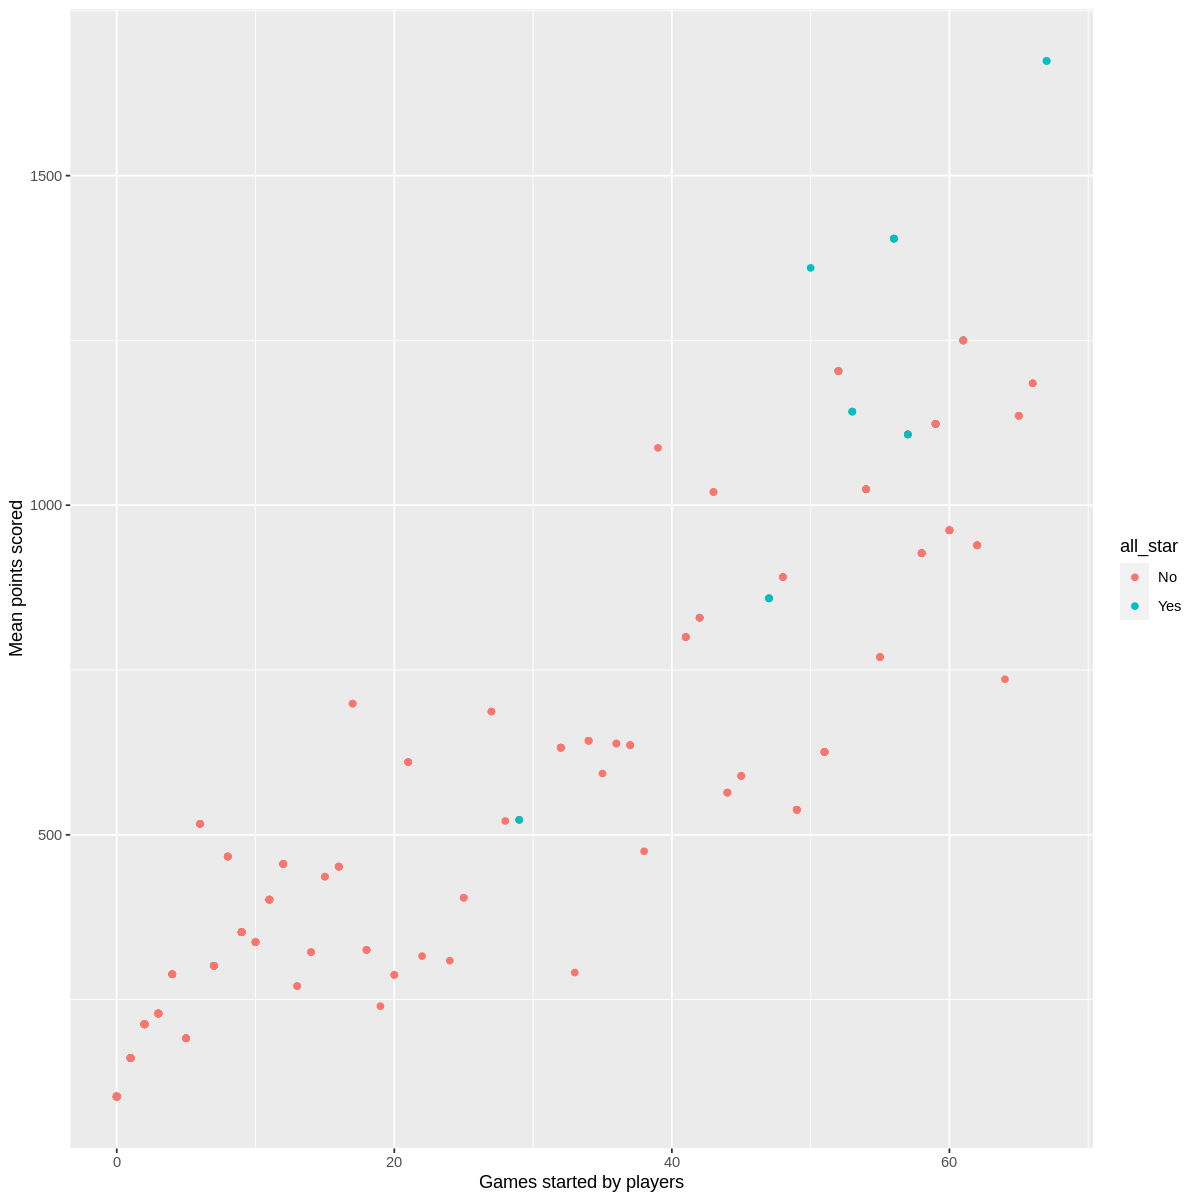

[1] "[graph 2]"


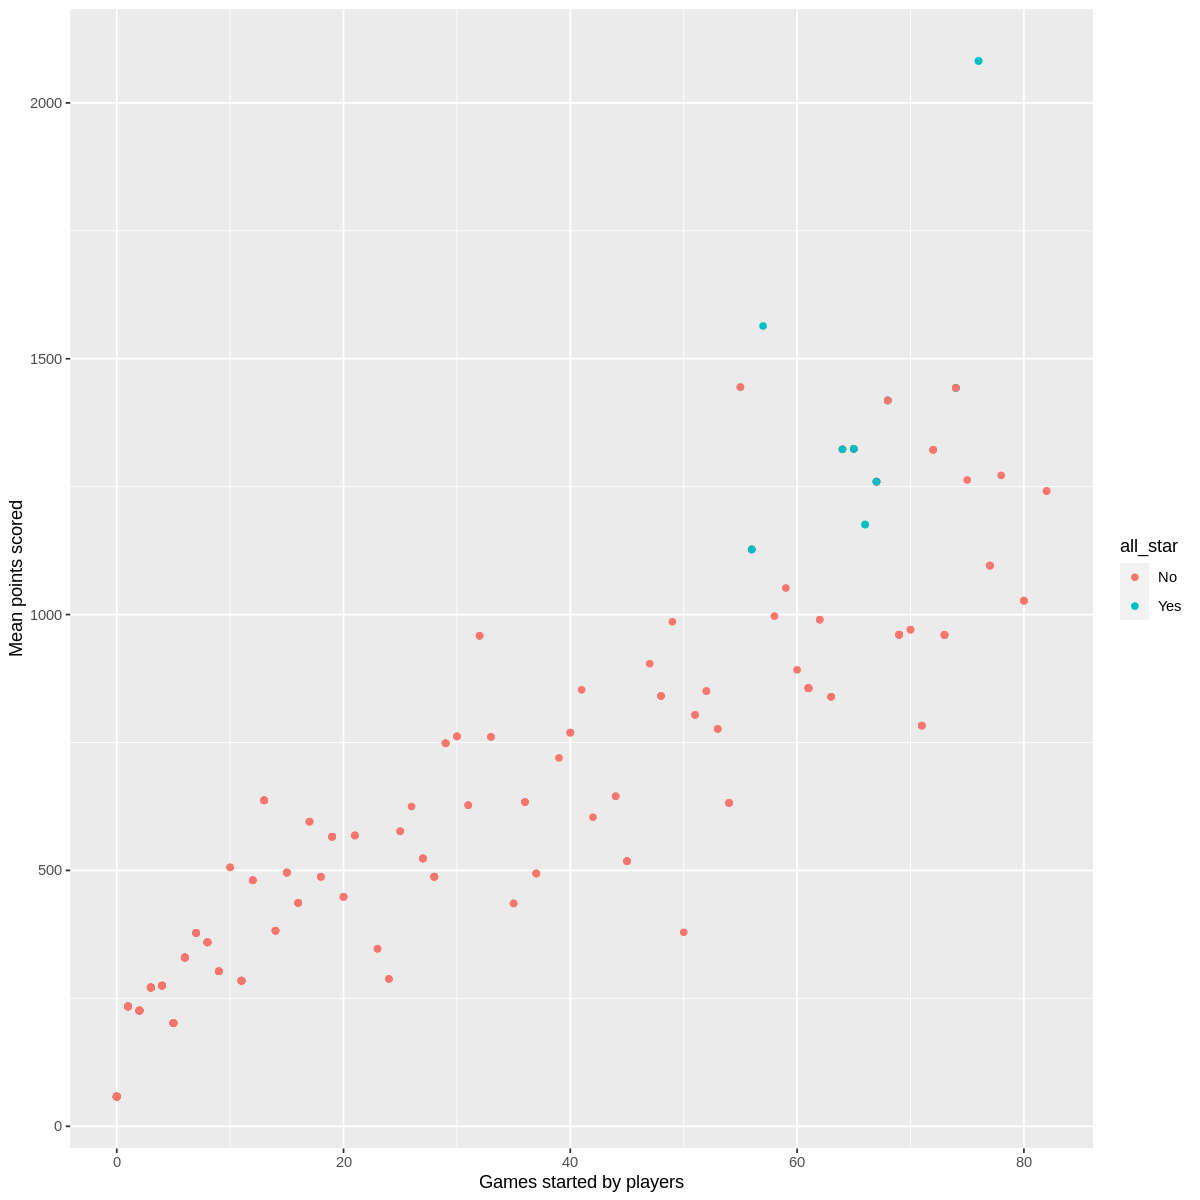

In [123]:
set.seed(123)

options(repr.plot.width = 10, repr.plot.height = 10)
#let's plot games started against the mean number of points to visualize this.
gs_against_meanpts_2023 <- summary_2023 |>
                      ggplot(aes(x = games_started, y= mean_points, color=all_star)) +
                      geom_point() +
                      labs(x= "Games started by players", y= "Mean points scored")
gs_against_meanpts_2023
print("[graph 1]")

gs_against_meanpts_2022 <- summary_2022 |>
                      ggplot(aes(x = games_started, y= mean_points, color=all_star)) +
                      geom_point() +
                      labs(x= "Games started by players", y= "Mean points scored")
gs_against_meanpts_2022
print("[graph 2]")

This shows that the higher the number of games started, the higher the average number of points scored per game, 
increasing such a player's chances of making it into the all star selections. We'll analyze how effective field goal affects all star selections later.

In [124]:
#let's group by all star players, and find the mean points scored.
summary1_2023 <- new_obs_training_2023 |>
            group_by(all_star) |> 
            summarize(mean_points = mean(points))
summary1_2023
print("[table 15]")

summary1_2022 <- new_obs_training_2022 |>
            group_by(all_star) |> 
            summarize(mean_points = mean(points))
summary1_2022
print("[table 16]")
#Here we can see that players who got selected as all star players have higher points per game on average.
#This further supports the above graph. 

all_star,mean_points
<fct>,<dbl>
No,375.5249
Yes,1427.3636


[1] "[table 15]"


all_star,mean_points
<fct>,<dbl>
No,403.5758
Yes,1578.2778


[1] "[table 16]"


We can see number of points will be an important variable! Now let's see about games started and points scored. 

[1] "[graph 3]"


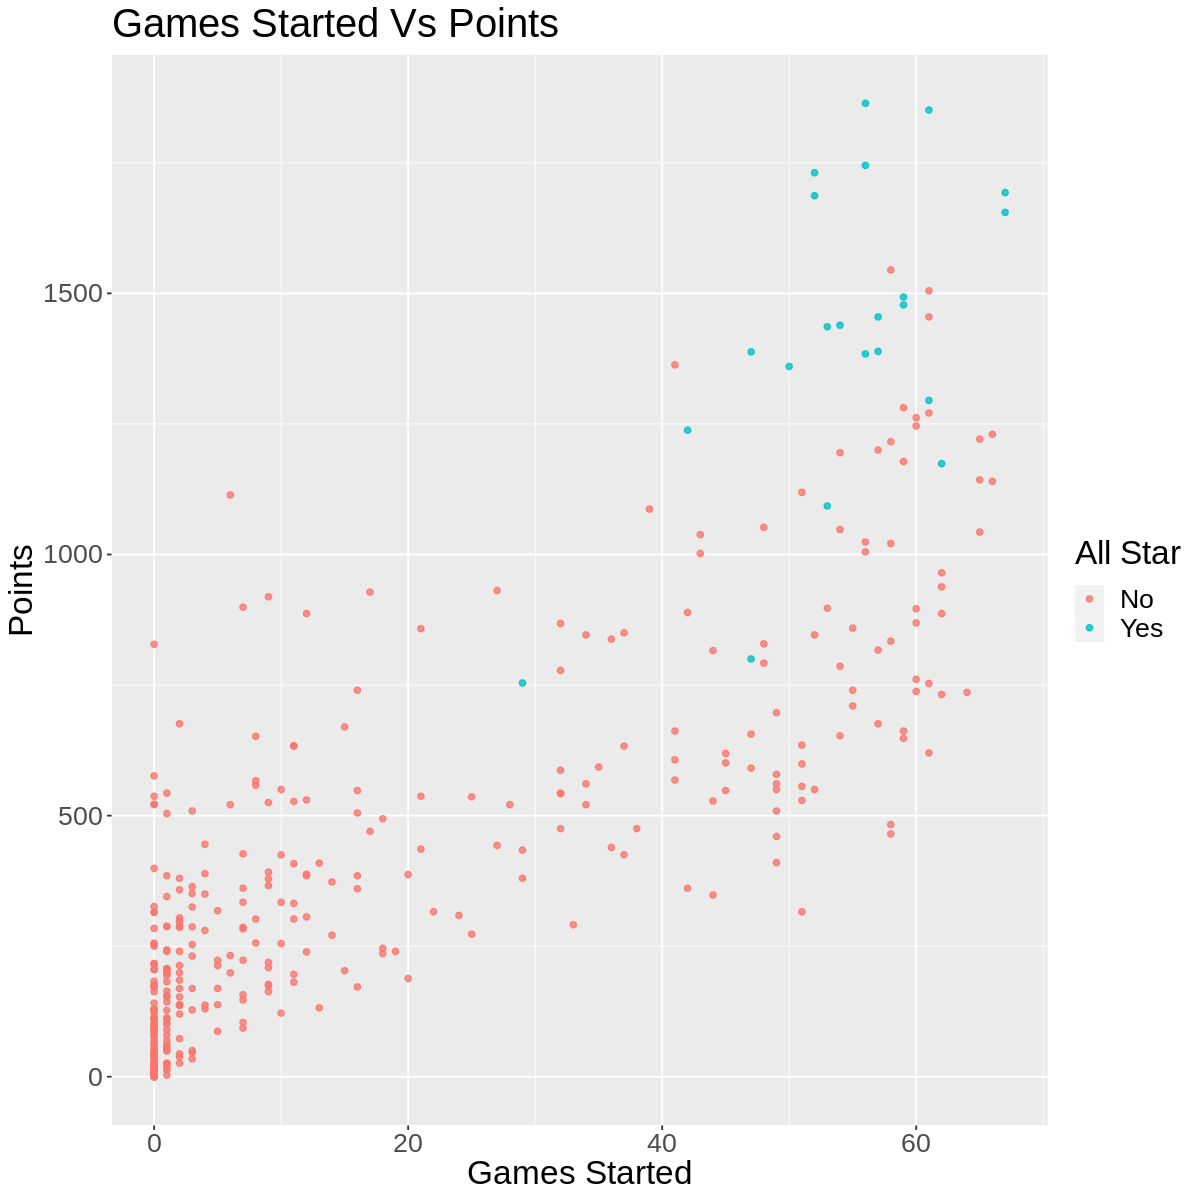

[1] "[graph 4]"


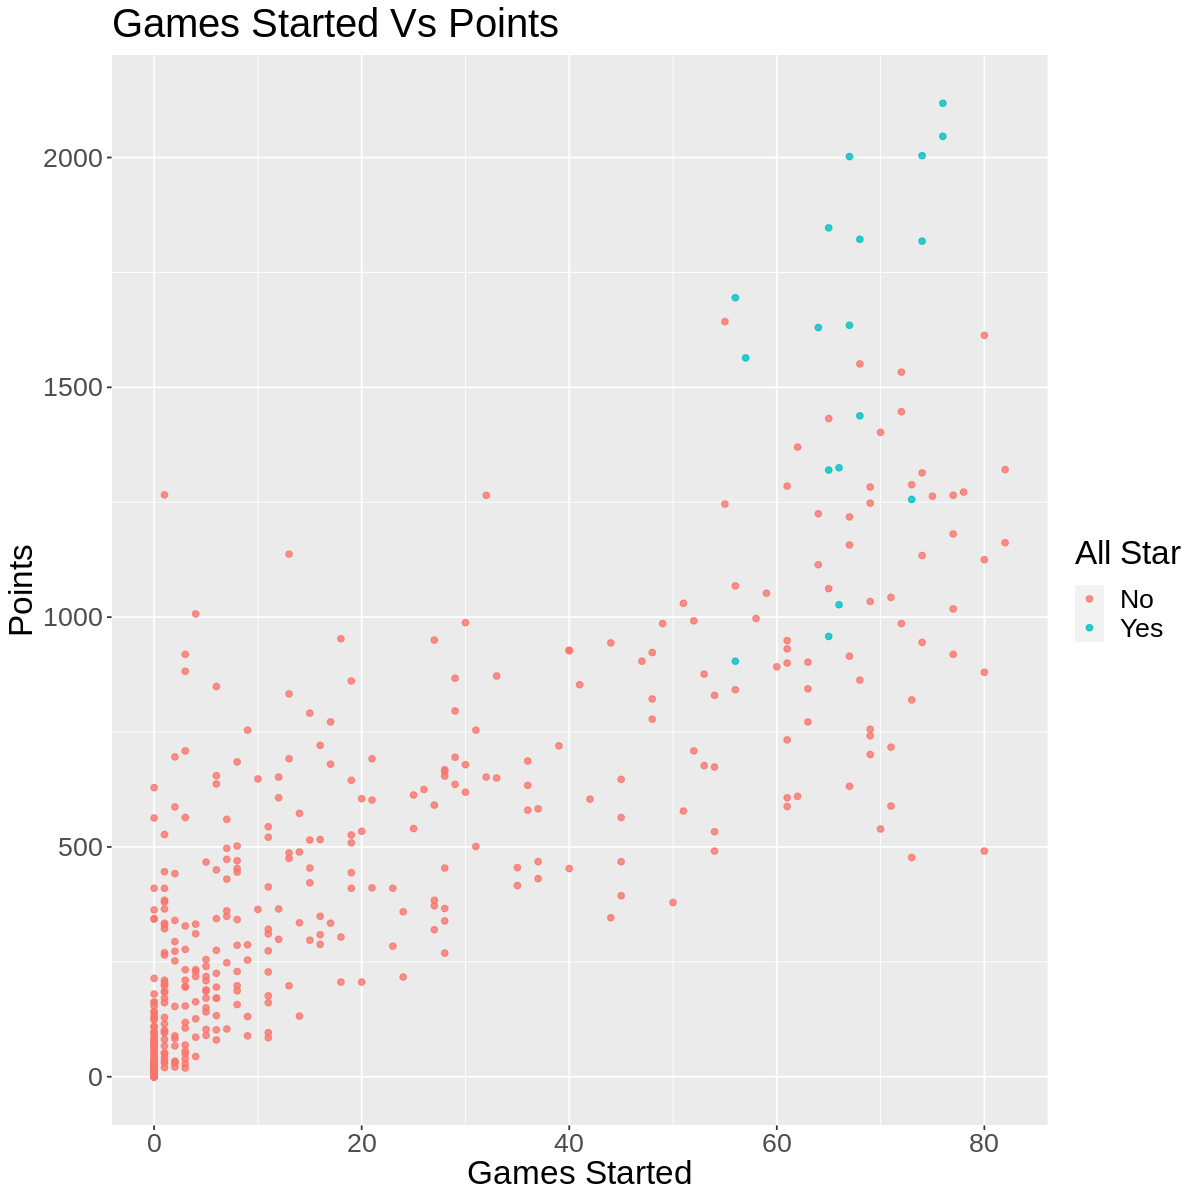

In [125]:
#what about games started vs points scored? How does the number of games started affect number of points scored?
new_obs_training_2023 |>
    ggplot(aes(x = games_started, y = points, color=all_star)) +
    geom_point(alpha = 0.8) +
    labs(x = "Games Started", y = "Points", color = "All Star", title = "Games Started Vs Points") +
    theme(text = element_text(size = 20))
print("[graph 3]")

new_obs_training_2022 |>
    ggplot(aes(x = games_started, y = points, color=all_star)) +
    geom_point(alpha = 0.8) +
    labs(x = "Games Started", y = "Points", color = "All Star", title = "Games Started Vs Points") +
    theme(text = element_text(size = 20))
print("[graph 4]")

Seems like players who have more games started, and hence higher points scored, will tend to be all star players. So games started is also an important variable. Let's focus on effective field goal now.

In [126]:
#let's group by the points scored by the players and see the relationship between it and the effective field goal. 
summary2_2023 <- new_obs_training_2023 |>
            group_by(points) |> 
            summarize(mean_efg = mean(effective_field_goal),  all_star = all_star) |>
            filter(all_star == "Yes")
summary2_2023
print("[table 17]")

summary2_2022 <- new_obs_training_2022 |>
            group_by(points) |> 
            summarize(mean_efg = mean(effective_field_goal),  all_star = all_star) |>
            filter(all_star == "Yes")
summary2_2022
print("[table 18]")

#we don't seem to see any sort of relationship between points scored and the effective field goal,
#but let's get a bigger picture through a simple plot.

`summarise()` has grouped output by 'points'. You can override using the
`.groups` argument.


points,mean_efg,all_star
<dbl>,<dbl>,<fct>
754,0.615,Yes
800,0.554,Yes
1093,0.587,Yes
⋮,⋮,⋮
1745,0.532,Yes
1851,0.537,Yes
1864,0.566,Yes


[1] "[table 17]"


`summarise()` has grouped output by 'points'. You can override using the
`.groups` argument.


points,mean_efg,all_star
<dbl>,<dbl>,<fct>
904,0.5845,Yes
958,0.5360,Yes
1027,0.7130,Yes
⋮,⋮,⋮
2004,0.620,Yes
2046,0.526,Yes
2118,0.521,Yes


[1] "[table 18]"


[1] "[graph 5]"


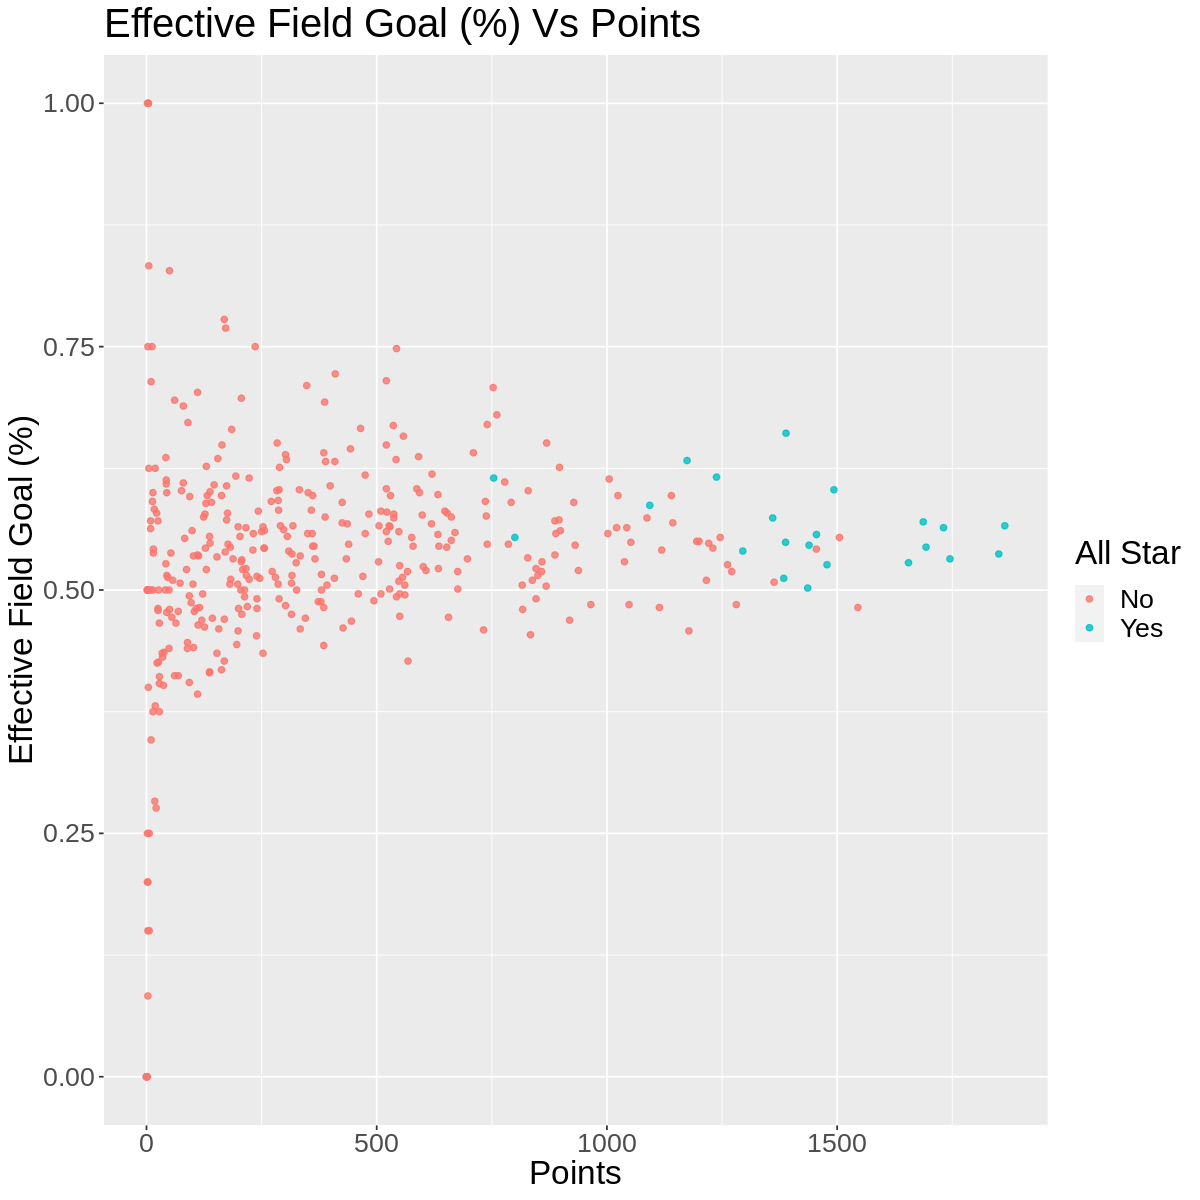

[1] "[graph 6]"


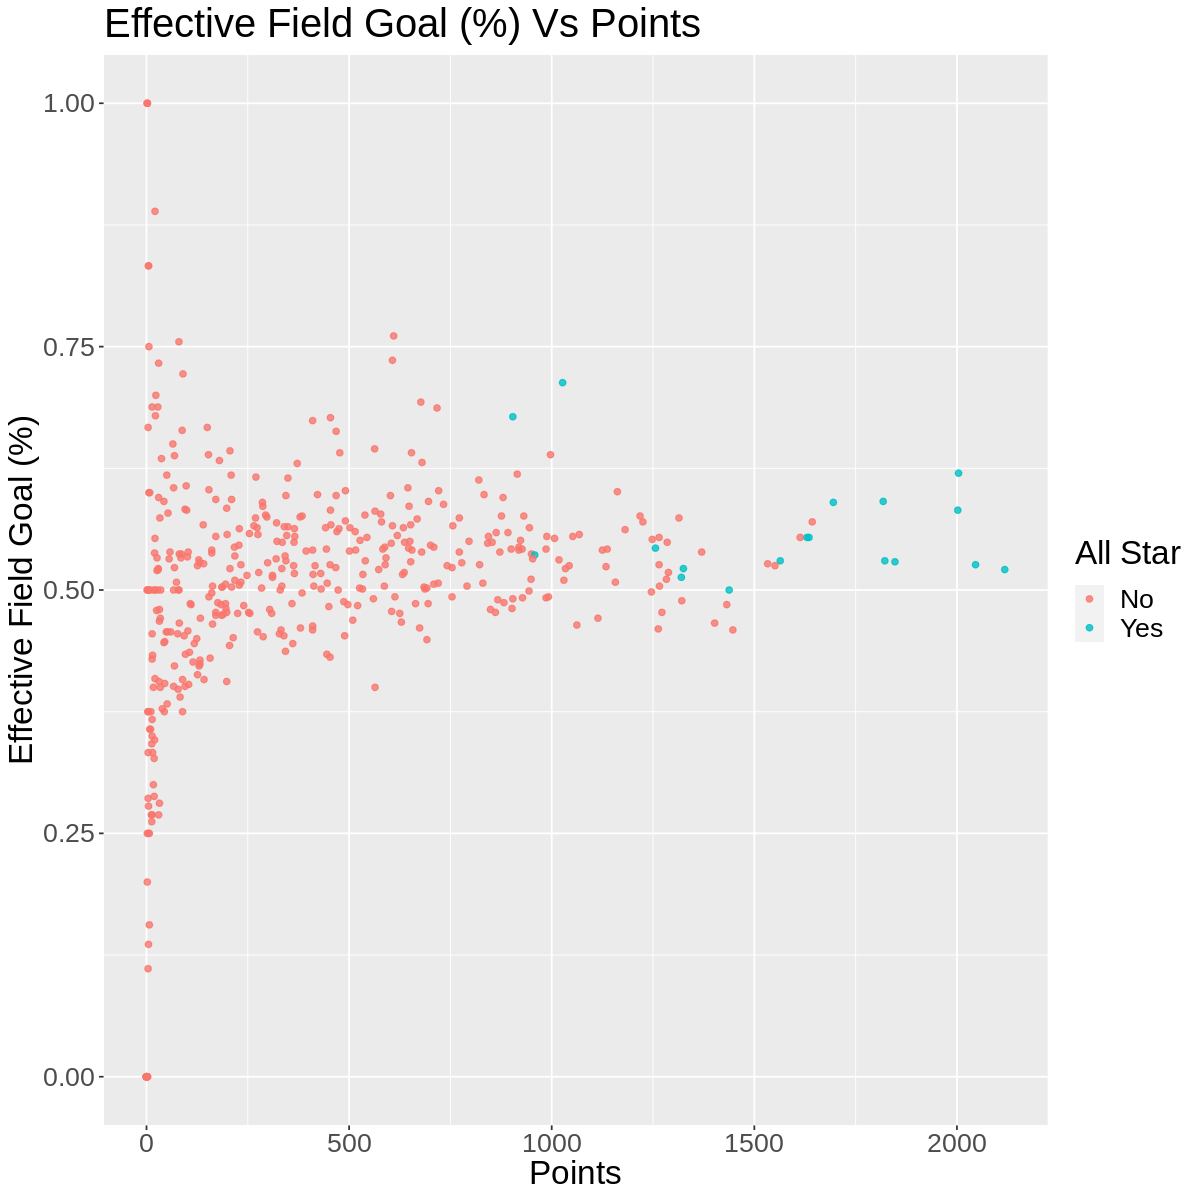

In [127]:
set.seed(123)
new_obs_training_2023 |>
    ggplot(aes(x = points, y = effective_field_goal, color=all_star)) +
    geom_point(alpha = 0.8) +
    labs(x = "Points", y = "Effective Field Goal (%)", color = "All Star", title = "Effective Field Goal (%) Vs Points") +
    theme(text = element_text(size = 20))
print("[graph 5]")

new_obs_training_2022 |>
    ggplot(aes(x = points, y = effective_field_goal, color=all_star)) +
    geom_point(alpha = 0.8) +
    labs(x = "Points", y = "Effective Field Goal (%)", color = "All Star", title = "Effective Field Goal (%) Vs Points") +
    theme(text = element_text(size = 20))
print("[graph 6]")

[1] "[graph 5 a)]"


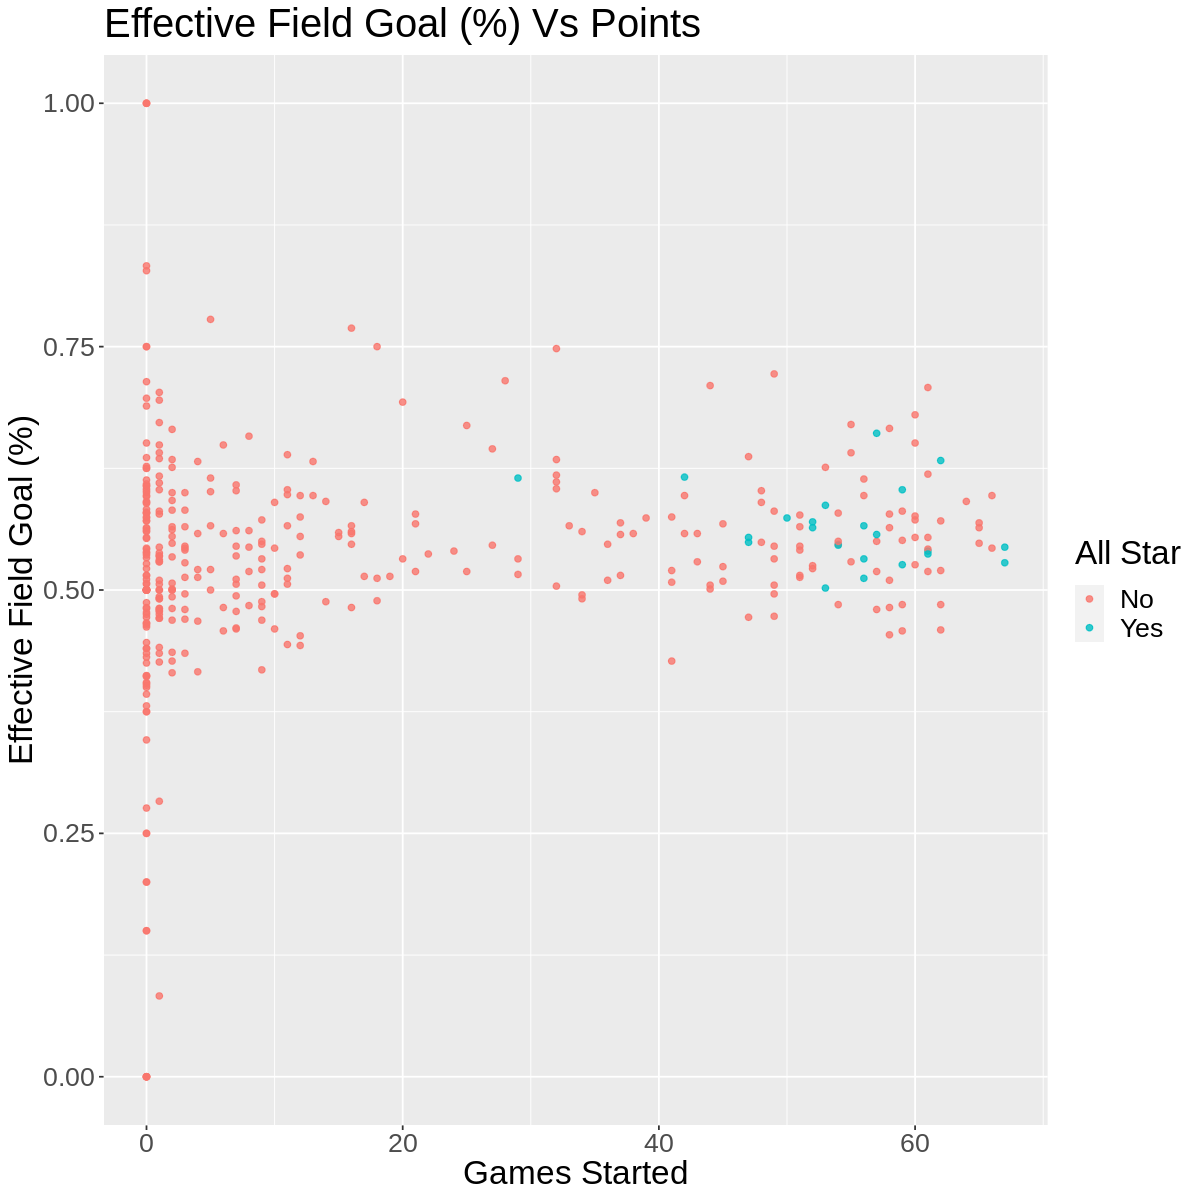

[1] "[graph 6 a)]"


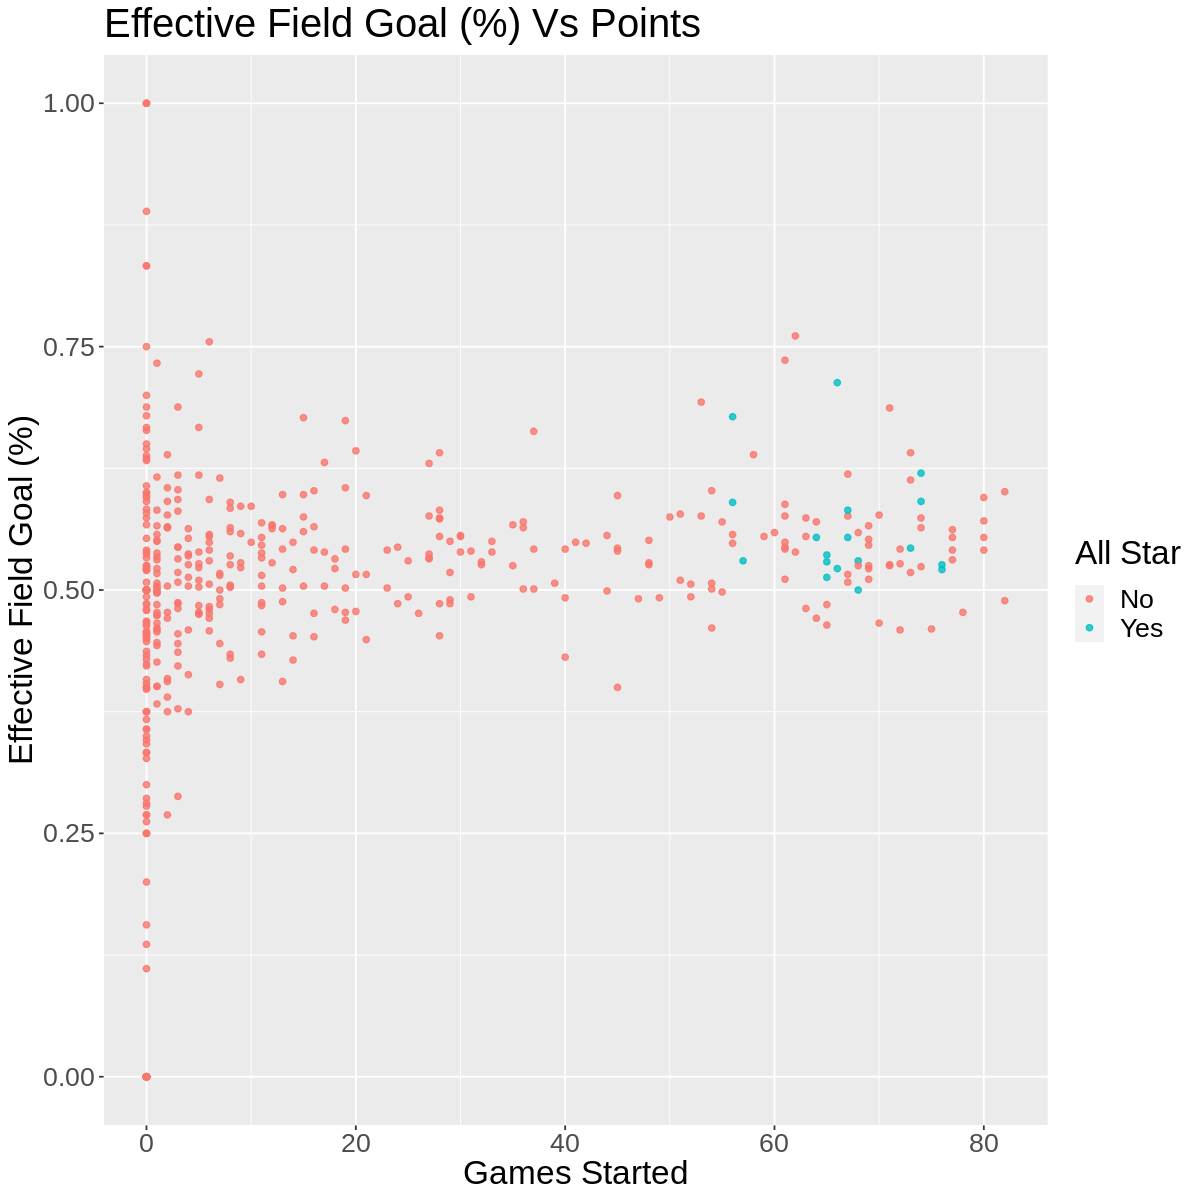

In [140]:
set.seed(123)
new_obs_training_2023 |>
    ggplot(aes(x = games_started, y = effective_field_goal, color=all_star)) +
    geom_point(alpha = 0.8) +
    labs(x = "Games Started", y = "Effective Field Goal (%)", color = "All Star", title = "Effective Field Goal (%) Vs Points") +
    theme(text = element_text(size = 20))
print("[graph 5 a)]")

new_obs_training_2022 |>
    ggplot(aes(x = games_started, y = effective_field_goal, color=all_star)) +
    geom_point(alpha = 0.8) +
    labs(x = "Games Started", y = "Effective Field Goal (%)", color = "All Star", title = "Effective Field Goal (%) Vs Points") +
    theme(text = element_text(size = 20))
print("[graph 6 a)]")

Here we can see that although the effective field goal remains more or less the same, players with higher points scored per game
have effective field goal ranging from 0.66825 and 0.537. So a player with high points scored and effective field goal in the given range is most likely worthy of being an All Star player. 

## What do we expect to find? Our impact? 

Our data analysis suggests that high-scoring players who start more games and have effective field goal percentages in the given range are more likely to become All Star players, but other factors could also be at play. Our proposal aims to use this analysis to predict future All Star players and develop similar models for predicting other beneficial player factors. These classification models could also help answer questions about physical attributes that contribute to player success, improving team strategies, and other areas where data science has significant potential.


**___________________________________________________________________**

## Performing the Classification and training the model.

Let's start the data analysis to answer find which NBA players will make it into the All-Star selections using Classification. First let's train a knn model. We don't know the number of nearest neighbors so we will tune in order to find the optimal number of K for our model. We use cross validation. 

In [128]:
#let's open the dataset we'll be working on once again for clarity. This is the 2022 dataset which we will be using for training
asfactor_all_star_2022
print("[table 19]")

player,games_started,effective_field_goal,points,all_star
<chr>,<dbl>,<dbl>,<dbl>,<fct>
Aaron Gordon,75,0.573,1126,No
Aaron Henry,0,0.200,2,No
Aaron Holiday,15,0.504,400,No
⋮,⋮,⋮,⋮,⋮
Zeke Nnaji,1,0.616,270,No
Ziaire Williams,31,0.540,501,No
Zylan Cheatham,0,0.000,0,No


[1] "[table 19]"


**Let’s set seed in each of the following code cellin order to ensure randomness and reproducibility of our model and continue making the classification model.**

In [129]:
set.seed(20222023)
#Making the recipe where our strata will be all_star and 
#our predictors will be games_started, effective_field_goal, 
#and points. We decided these are the most important factors 
#to determine the player’s chance at being in the all_star 
#selections from the data visualizations above. 
nba_recipe <- recipe(all_star ~ games_started + effective_field_goal + points, data = asfactor_all_star_2022) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())
nba_recipe

Recipe

Inputs:

      role #variables
   outcome          1
 predictor          3

Operations:

Scaling for all_predictors()
Centering for all_predictors()

In [130]:
set.seed(20222023)
#construct the classification model with an experimental value 
#for the K-nearest neighbors, and put it all together in a 
#workflow, we decided to do this to get an idea of the 
#accuracy of the model.
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 3) |>
  set_engine("kknn") |>
  set_mode("classification")
knn_fit <- workflow() |>
  add_recipe(nba_recipe) |>
  add_model(knn_spec) |>
  fit(data = asfactor_all_star_2022)
knn_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(3,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.03355705
Best kernel: rectangular
Best k: 3

In [131]:
set.seed(20222023)
#Print the prediction result on the validation data and compute the accuracy
nba_test_predictions <- predict(knn_fit, asfactor_all_star_2023) |>
  bind_cols(asfactor_all_star_2023)
nba_test_predictions
print("[table 20]")
nba_prediction_accuracy <- nba_test_predictions |>
         metrics(truth = all_star, estimate = .pred_class)  
nba_prediction_accuracy
print("[table 21]")
nba_mat <- nba_test_predictions |> 
       conf_mat(truth = all_star, estimate = .pred_class)
nba_mat

.pred_class,player,games_started,effective_field_goal,points,all_star
<fct>,<chr>,<dbl>,<dbl>,<dbl>,<fct>
No,A.J. Green,0,0.625,139,No
No,A.J. Lawson,0,0.635,34,No
No,Aaron Gordon,53,0.626,897,No
⋮,⋮,⋮,⋮,⋮,⋮
No,Zeke Nnaji,5,0.615,223,No
No,Ziaire Williams,3,0.470,169,No
No,Zion Williamson,29,0.615,754,Yes


[1] "[table 20]"


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.9610136
kap,binary,0.4822888


[1] "[table 21]"


          Truth
Prediction  No Yes
       No  483  17
       Yes   3  10

In [143]:
set.seed(20222023)
#Verify accuracy use cross-validation
nba_vfold <- vfold_cv(asfactor_all_star_2022, v = 5, strata = all_star)
#Fit the knn model using the resamples
nba_resample_fit <- workflow() |>
       add_recipe(nba_recipe) |>
       add_model(knn_spec) |>
       fit_resamples(resamples = nba_vfold)
#Produce the accuracy metrics based on resampling
nba_metrics <- nba_resample_fit |> 
  collect_metrics() 
nba_metrics
print("[table 22]")

.metric,.estimator,mean,n,std_err,.config
<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
accuracy,binary,0.9647899,5,0.006124085,Preprocessor1_Model1
roc_auc,binary,0.8741137,5,0.039488793,Preprocessor1_Model1


[1] "[table 22]"


**Let’s find the best k-nearest neighbor using tuning in our model specification. We will set up cross validation with tune grid in order to do this, and compute the accuracy. Then we’ll plot a graph to visualize the K-nearest neighbors.**

In [133]:
set.seed(20222023)
#tuning the model.
knn_tune <- nearest_neighbor(weight_func = "rectangular", 
                             neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")
knn_tune

#for cross validation from 1 to 50 neighbors.
k_vals <- tibble(neighbors = seq(from = 1, to = 50, by = 1))

#putting it all together in a workflow.
knn_results <- workflow() |>
       add_recipe(nba_recipe) |>
       add_model(knn_tune) |>
       tune_grid(resamples = nba_vfold, grid = k_vals) |>
       collect_metrics() |>
       filter(.metric == "accuracy") |>
       arrange(-mean)
knn_results
print("[table 23]")

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
19,accuracy,binary,0.9765406,5,0.005516234,Preprocessor1_Model19
20,accuracy,binary,0.9765406,5,0.005516234,Preprocessor1_Model20
15,accuracy,binary,0.9748599,5,0.005259565,Preprocessor1_Model15
⋮,⋮,⋮,⋮,⋮,⋮,⋮
32,accuracy,binary,0.9597479,5,0.00669163,Preprocessor1_Model32
33,accuracy,binary,0.9597479,5,0.00669163,Preprocessor1_Model33
34,accuracy,binary,0.9597479,5,0.00669163,Preprocessor1_Model34


[1] "[table 23]"


[1] "[graph 7]"


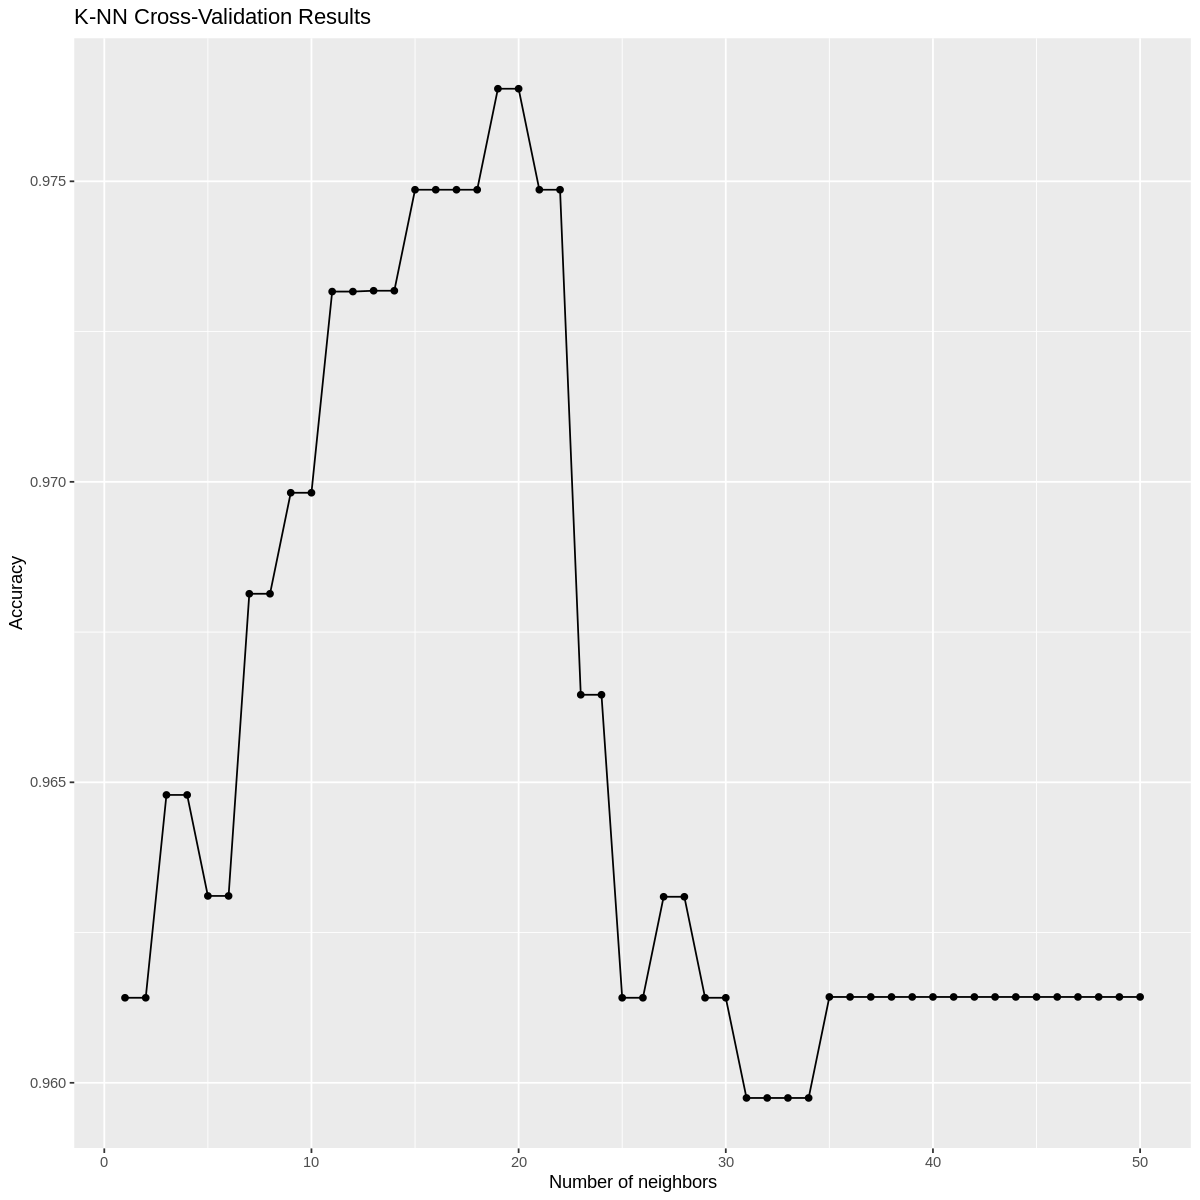

In [134]:
set.seed(20222023)
#graph of the knn results to find the best k-nearest neighbor
cross_val_plot <- knn_results %>%
  ggplot(aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Number of neighbors", y = "Accuracy", title = "K-NN Cross-Validation Results")
cross_val_plot
print("[graph 7]")

**Now that we have the best K-nearest neighbor, let’s compute it into our final model and also test its accuracy.**

In [135]:
set.seed(20222023)
#using K-nearest neighbors as 11 to make the final model 
nba_spec_fin <- nearest_neighbor(weight_func = "rectangular", neighbors = 11) |> 
  set_engine("kknn") |> 
  set_mode("classification")

#set it all in a workflow 
nba_fit_fin <- workflow() |>
  add_recipe(nba_recipe) |>
  add_model(nba_spec_fin) |>
  fit(data = asfactor_all_star_2022)

#computing the accuracy 
nba_predictions_fin <- predict(nba_fit_fin, asfactor_all_star_2023) |>
    bind_cols(asfactor_all_star_2023)
nba_metrics_fin <- nba_predictions_fin |>
    metrics(truth = all_star, estimate = .pred_class)
nba_metrics_fin
print("[table 24]")
nba_conf_mat_fin <- nba_predictions_fin |>
    conf_mat(truth = all_star, estimate = .pred_class)
nba_conf_mat_fin

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.9610136
kap,binary,0.3987342


[1] "[table 24]"


          Truth
Prediction  No Yes
       No  486  20
       Yes   0   7

## Results
________________________


Our analysis of the 2021 and 2022 NBA player datasets has produced exciting results, revealing the impressive accuracy of our KNN classification model when classifying variables such as points, effective field goal percentage, and games started. With an accuracy rate of 95.91% when applied to the 2022 dataset after being trained on the 2021 data, our model is a powerful tool for predicting player performance.
 
Examining our truth matrix, we can see a count of 486 when the prediction is No and the truth is also No, while there are 21 instances when the prediction is No and the truth is Yes. We observe a count of 0 when the prediction is Yes and the truth is No, with a frequency of 6 when the prediction is Yes and the truth is also Yes. This means that out of a total of 513 observations, there were only 21 instances of misidentification, demonstrating the high level of accuracy of our model.
 
When using the model to predict the 2022 NBA All-Star team, we found that our results were verified by the actual All-Star team lineup, even when accounting for errors and residual players. Our dataset further revealed that the optimal k value for our knn classification engine was k=11, with a mean of 0.9782 and a standard error of 0.006262, underscoring the reliability and accuracy of our model.
 
These findings are significant, as they demonstrate the effectiveness of our classification model in predicting NBA player performance and identifying All-Star players. This information can be used to inform various aspects of the NBA, such as player evaluations, team-building, and contract negotiations. Our results provide valuable insights for teams and organizations looking to make informed decisions about their rosters and strategies, and underscore the potential benefits of using advanced statistical models to analyze player performance.


## Discussion

Initially, we hypothesized that NBA All-Star players who make the All-Star teams were highly skilled and demonstrated this through high effective field goal percentage, points scored, and games started. Our analysis has confirmed this hypothesis, as our examination of the 2022 NBA dataset shows that all 17 All-Star players had an eFG% of at least 50%, and the top 8 in points scored were among the highest of all NBA player observations. Furthermore, all 17 All-Stars started in more than 55 games, placing them in the upper quartile of total games started in a distribution that is skewed to the left.
 
These findings provide compelling evidence to support our initial assumption that All-Star players possess exceptional skills in scoring and starting games, and that they are distinguished by their ability to maintain high levels of efficiency and consistency throughout the season. This knowledge can be used to inform future analyses and help identify potential All-Stars based on their performance in these key areas.
 
Our analysis revealed that the vast majority of players in the datasets were non-Allstars, presenting a challenge for our predictive, classification model. As our model's accuracy is reliant on correctly identifying and only considering Allstars, with only 25 players in this category in a total of 596 players, our predictions were successful for only 9 of them in the 2023 season. This gives our model a larger room for error due to the nature of our dataset.
 
Furthermore, we discovered that changes between the 2021 and 2022 NBA datasets, such as variations in the total number of players in the league, from 530 to 596, and an increase in the total number of Allstars on teams, from 21 to 27 players, which introduced a margin of error in our calculations. It is crucial to recognize and address these limitations to ensure the reliability and accuracy of our model. Future efforts could focus on refining our model or collecting additional data to enhance its predictive capabilities and increase accuracy.
 
The findings from our analysis demonstrate a strong correlation between All-Star rankings and performance in key categories such as scoring, eFG%, and games started across both the 2022 and 2023 NBA seasons. This correlation has significant implications for predicting future NBA All-Stars and can inform various aspects of player and team valuation, including contract value, player trade potential, and generating fanbase support.
 
By identifying players with strong performances in these critical areas, we can forecast their likelihood of making the All-Star team, which can have a substantial impact on their contract negotiations and earning potential. This knowledge can also help teams make informed decisions when it comes to trading players or building a winning roster. Additionally, making it to the All-Star team can generate significant fan support and recognition, leading to increased revenue and marketability for both the player and the team. Overall, our findings underscore the value of analyzing player performance in relation to All-Star rankings and highlight the potential benefits of using this information to inform decision-making in the NBA.

## Further questions this could lead to
____________________________________________

- Similar classification models could also help answer questions about physical attributes that contribute to player success, improving team strategies, and other areas where data science has significant potential.

- We can also predict NBA player totals (points, assists, rebounds, etc) in future seasons based on past data

- We can also predict a NBA teams future season record based on player and team data

## References
______________________________

1) 2021-22 NBA Player Stats: Totals | Basketball-Reference.com. (n.d.). Basketball-Reference.com. https://www.basketball-reference.com/leagues/NBA_2022_totals.html

2) 2022-23 NBA Player Stats: Totals | Basketball-Reference.com. (n.d.). Basketball-Reference.com. https://www.basketball-reference.com/leagues/NBA_2023_totals.html

3) 2023 NBA All-Star Game picks: Why Team Giannis, Ja Morant are best bets for Sunday’s action - CBSSports.com. (2023, February 19). CBSSports.com. https://www.cbssports.com/nba/news/2023-nba-all-star-game-picks-why-team-giannis-ja-morant-are-best-bets-for-sundays-action/

4) Insiders, E. B. (2023, February 17). NBA All-Star Weekend betting picks and best bets. ESPN.com. https://www.espn.com/chalk/story/_/id/35681530/nba-all-star-weekend-betting-picks